# Introduction


Introduction to Machine Learning Project: Analysis of the Real Estate Market in Singapore

This machine learning project aims to analyze the real estate market in Singapore using Airbnb data as a basis. The target variable for this study is the rental price of properties listed on the platform. The dataset includes various property characteristics such as room type, location, minimum number of nights, among others.

The main purpose of this project is to develop predictive models capable of accurately estimating rental prices based on property characteristics. This can provide valuable insights for investors, property owners, and real estate professionals in Singapore.

Throughout this report, different stages will be addressed, including data preprocessing, exploratory analysis, development, and evaluation of machine learning models. The goal is to provide insights into which features have the greatest influence on rental prices and how models can be used to accurately predict these values.

# IMPORT LIBRARIES

To meet the requirements of the task, I started by importing the libraries needed for the job and will proceed with reading the dataset to characterize it. Next, I will apply data preparation methods and EDA (Exploratory Data Analysis) visualization techniques, and finally I will apply the machine learning models.

In [408]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.image as plt
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px


# Loading the file 

Reading the file, the chosen file was the database of airbnb Singapoura, this data set contains information on Location, price, number of reviews, number of reviews among others, this data set was extracted from Kaggle

In [409]:
df=pd.read_csv("listings.csv")

# Characterisation of the data set


I will perform data characterization in Python to understand the essential characteristics of the data, such as examining the dimensions of the dataset, identifying types of variables present, exploring statistics, among others. The analyses conducted will be detailed below.

# Head 



Viewing the first 5 rows in a dataset of 16 columns

In [410]:
df.head ()

id                                 name  host_id  host_name  \
0  49091    COZICOMFORT LONG TERM STAY ROOM 2   266763  Francesca   
1  50646      Pleasant Room along Bukit Timah   227796    Sujatha   
2  56334                          COZICOMFORT   266763  Francesca   
3  71609  Ensuite Room (Room 1 & 2) near EXPO   367042    Belinda   
4  71896      B&B  Room 1 near Airport & EXPO   367042    Belinda   

  neighbourhood_group neighbourhood  latitude  longitude     room_type  price  \
0        North Region     Woodlands   1.44255  103.79580  Private room     83   
1      Central Region   Bukit Timah   1.33235  103.78521  Private room     81   
2        North Region     Woodlands   1.44246  103.79667  Private room     69   
3         East Region      Tampines   1.34541  103.95712  Private room    206   
4         East Region      Tampines   1.34567  103.95963  Private room     94   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0             180                  1  2013-10-21               0.01   
1              90                 18  2014-12-26               0.28   
2               6                 20  2015-10-01               0.20   
3               1                 14  2019-08-11               0.15   
4               1                 22  2019-07-28               0.22   

   calculated_host_listings_count  availability_365  
0                               2               365  
1                               1               365  
2                               2               365  
3                               9               353  
4                               9               355

# Shape 

Viewing the dataset size

In this dataset we have 7907 rows and 16 columns

In [411]:
df.shape

(7907, 16)

# Info

A concise and informative summary of the set, including information about data types, the number of non-null entries, and the amount of memory used.



In [412]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7907 non-null   int64  
 1   name                            7905 non-null   object 
 2   host_id                         7907 non-null   int64  
 3   host_name                       7907 non-null   object 
 4   neighbourhood_group             7907 non-null   object 
 5   neighbourhood                   7907 non-null   object 
 6   latitude                        7907 non-null   float64
 7   longitude                       7907 non-null   float64
 8   room_type                       7907 non-null   object 
 9   price                           7907 non-null   int64  
 10  minimum_nights                  7907 non-null   int64  
 11  number_of_reviews               7907 non-null   int64  
 12  last_review                     51

# Understanding dataset 

The describe function provides a statistical summary of the numeric columns in a dataset, including counts, means, standard deviations, quartiles, and minimum and maximum values.

In [413]:
df.describe ()

id       host_id     latitude    longitude         price  \
count  7.907000e+03  7.907000e+03  7907.000000  7907.000000   7907.000000   
mean   2.338862e+07  9.114481e+07     1.314192   103.848787    169.332996   
std    1.016416e+07  8.190910e+07     0.030577     0.043675    340.187599   
min    4.909100e+04  2.366600e+04     1.243870   103.646560      0.000000   
25%    1.582180e+07  2.305808e+07     1.295795   103.835825     65.000000   
50%    2.470627e+07  6.344891e+07     1.311030   103.849410    124.000000   
75%    3.234850e+07  1.553811e+08     1.322110   103.872535    199.000000   
max    3.811276e+07  2.885676e+08     1.454590   103.973420  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count     7907.000000        7907.000000        5149.000000   
mean        17.510054          12.807386           1.043669   
std         42.094616          29.707746           1.285851   
min          1.000000           0.000000           0.010000   
25%          1.000000           0.000000           0.180000   
50%          3.000000           2.000000           0.550000   
75%         10.000000          10.000000           1.370000   
max       1000.000000         323.000000          13.000000   

       calculated_host_listings_count  availability_365  
count                     7907.000000       7907.000000  
mean                        40.607689        208.726318  
std                         65.135253        146.120034  
min                          1.000000          0.000000  
25%                          2.000000         54.000000  
50%                          9.000000        260.000000  
75%                         48.000000        355.000000  
max                        274.000000        365.000000

Price: The average rental price is approximately $169.33.

Minimum nights: The average minimum number of nights for rental is approximately 17.51, with most rentals requiring less than 10 minimum nights. However, the maximum value is 10,000 nights, which seems to be an anomaly.

Number of reviews and reviews per month: The average number of reviews per month is approximately 12.81, indicating a reasonable rate of guest feedback. However, there is a large variation, as evidenced by the relatively high standard deviation of 29.71.

Availability: The average availability throughout the year is approximately 208.73 days, indicating that, on average, accommodations are available for booking for much of the year. However, again, there is considerable variation, as indicated by the standard deviation of 146.12.

Bringing in the statistical data by object

In [414]:
df.describe(include="object")

name host_name  \
count                                                7905      7907   
unique                                               7457      1833   
top     Luxury hostel with in-cabin locker - Single mixed       Jay   
freq                                                   13       290   

       neighbourhood_group neighbourhood        room_type last_review  
count                 7907          7907             7907        5149  
unique                   5            43                3        1001  
top         Central Region       Kallang  Entire home/apt  2019-08-12  
freq                  6309          1043             4132         152

Identifying Null Values in Data Set

# Identifying missing values

In [415]:
df.isnull().sum()

id                                   0
name                                 2
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2758
reviews_per_month                 2758
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [416]:
df.isnull().sum().sum()

5518

a list with all missing value formats

In [417]:
m_v_f = ["n.a", ",", "?", "NA", "n/a", "na", "--"]

In [418]:
df = pd.read_csv("listings.csv", na_values=m_v_f)

In [419]:
df.isnull().sum().sum()

5518

During the analysis, it was identified that 5518 missing values were present. The variable m_v_f contains a list of strings that can be interpreted as representations of missing values in the dataset.

In [420]:
df.head ()

id                                 name  host_id  host_name  \
0  49091    COZICOMFORT LONG TERM STAY ROOM 2   266763  Francesca   
1  50646      Pleasant Room along Bukit Timah   227796    Sujatha   
2  56334                          COZICOMFORT   266763  Francesca   
3  71609  Ensuite Room (Room 1 & 2) near EXPO   367042    Belinda   
4  71896      B&B  Room 1 near Airport & EXPO   367042    Belinda   

  neighbourhood_group neighbourhood  latitude  longitude     room_type  price  \
0        North Region     Woodlands   1.44255  103.79580  Private room     83   
1      Central Region   Bukit Timah   1.33235  103.78521  Private room     81   
2        North Region     Woodlands   1.44246  103.79667  Private room     69   
3         East Region      Tampines   1.34541  103.95712  Private room    206   
4         East Region      Tampines   1.34567  103.95963  Private room     94   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0             180                  1  2013-10-21               0.01   
1              90                 18  2014-12-26               0.28   
2               6                 20  2015-10-01               0.20   
3               1                 14  2019-08-11               0.15   
4               1                 22  2019-07-28               0.22   

   calculated_host_listings_count  availability_365  
0                               2               365  
1                               1               365  
2                               2               365  
3                               9               353  
4                               9               355

# Missing values handling _ Data cleaning


Missing values handling refers to the process of dealing with missing/null values in a dataset. In this task, we use three approaches, namely:

Imputation Models:Rather than using basic statistics to replace missing values, these models predict missing values based on other variables in the datase

Imputation:Replaces missing values with calculated values. This can be done using simple statistics like mean, median, or mode, or through more advanced techniques like regression or machine learning models.

Removal of Rows or Columns): Removes observations or variables that contain missing values.



The columns last_review and reviews_per_month will not be used, therefore, they will be deleted

# Drop missing values columns

In [421]:
df = df.drop(['last_review', 'reviews_per_month', 'name', "id", "host_name", "host_id"], axis=1)

Checking missing values 

In [422]:
df.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [423]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             7907 non-null   object 
 1   neighbourhood                   7907 non-null   object 
 2   latitude                        7907 non-null   float64
 3   longitude                       7907 non-null   float64
 4   room_type                       7907 non-null   object 
 5   price                           7907 non-null   int64  
 6   minimum_nights                  7907 non-null   int64  
 7   number_of_reviews               7907 non-null   int64  
 8   calculated_host_listings_count  7907 non-null   int64  
 9   availability_365                7907 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 617.9+ KB


In [424]:
df.isnull().sum().sum()

0

After the data cleanup has been performed, we no longer have any missing values

In [425]:
df.nunique()

neighbourhood_group                  5
neighbourhood                       43
latitude                          4885
longitude                         5414
room_type                            3
price                              374
minimum_nights                      73
number_of_reviews                  208
calculated_host_listings_count      55
availability_365                   359
dtype: int64

Viewing the size of the data set after cleaning

In [426]:
df.shape

(7907, 10)

# Checking for duplicates

Identifying if there are duplicated data entries in the dataset

In [427]:
duplicates = df.duplicated()
print(df[duplicates])

     neighbourhood_group neighbourhood  latitude  longitude        room_type  \
7902      Central Region    Queenstown   1.27973  103.78751  Entire home/apt   

      price  minimum_nights  number_of_reviews  \
7902    100               3                  0   

      calculated_host_listings_count  availability_365  
7902                              31                61  


Checking the Number of Duplicate Rows

In [428]:
df.drop_duplicates()
df.shape

(7907, 10)

# Data Exploration

In [429]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_columns.corr()

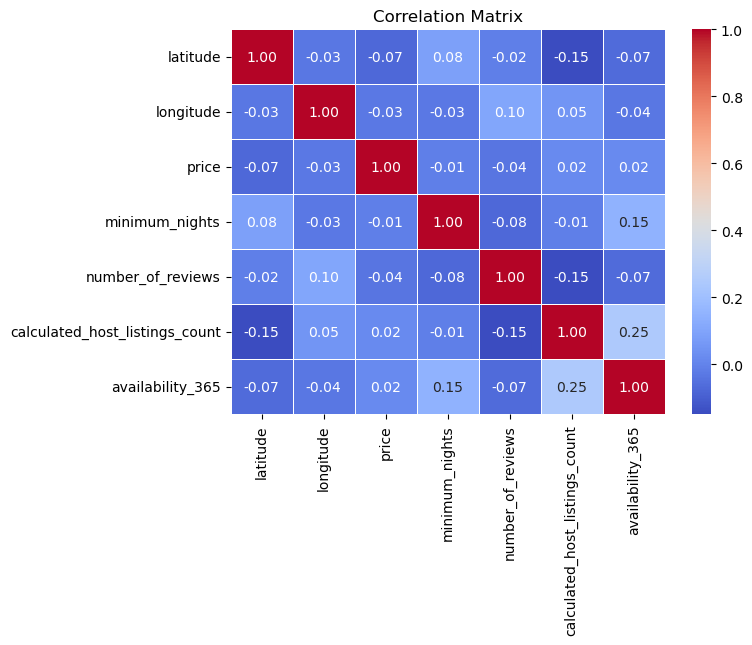

In [430]:
plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

a maioria dos dados foram correlacionados negativame

C:\Users\Ana Paula Damasceno\AppData\Local\Temp\ipykernel_12376\2092179427.py:4: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



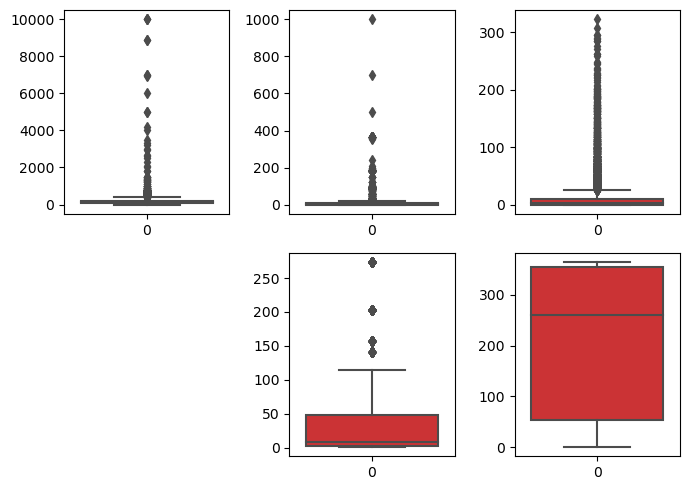

In [432]:
from pylab import *
f, ax = plt.subplots(figsize=(7, 5))

subplot(2,3,1)
sns.boxplot(df['price'])

subplot(2,3,2)
sns.boxplot(df['minimum_nights'])

subplot(2,3,3)
sns.boxplot(df['number_of_reviews'])
subplot(2,3,5)
sns.boxplot(df['calculated_host_listings_count'])

subplot(2,3,6)
sns.boxplot(df['availability_365'])

plt.tight_layout() # avoid overlap of plotsplt.draw()

In [307]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [309]:
# Assuming df is your DataFrame containing the data
neighborhood_counts = df['neighbourhood'].value_counts().reset_index()
neighborhood_counts.columns = ['neighbourhood', 'count']

fig = go.Figure(go.Bar(
    x=neighborhood_counts['neighbourhood'], y=neighborhood_counts['count'],
    marker={'color': neighborhood_counts['count'], 'colorscale': 'Viridis'},  
    text=neighborhood_counts['count'],
    textposition="outside",
))
fig.update_layout(xaxis_title="Neighbourhood", yaxis_title="Count")
fig.show()

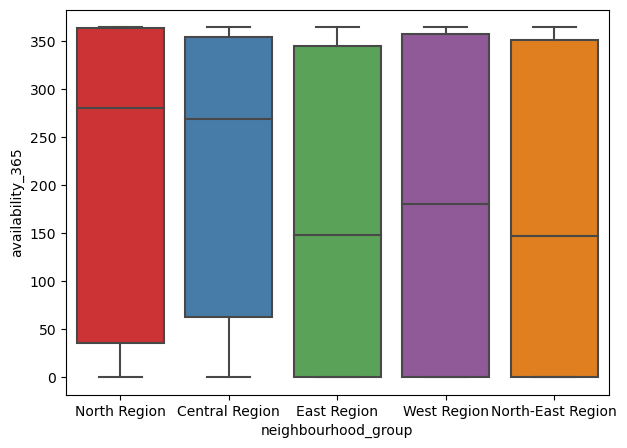

In [433]:
plt.figure(figsize=(7,5))
ax = sns.boxplot(data=df, x='neighbourhood_group',y='availability_365')

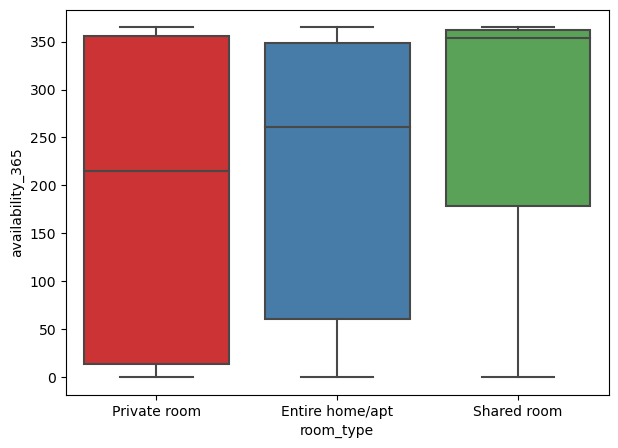

In [434]:
plt.figure(figsize=(7,5))
ax = sns.boxplot(data=df, x='room_type',y='availability_365')

In [312]:
df.head ()

neighbourhood_group neighbourhood  latitude  longitude     room_type  price  \
0        North Region     Woodlands   1.44255  103.79580  Private room     83   
1      Central Region   Bukit Timah   1.33235  103.78521  Private room     81   
2        North Region     Woodlands   1.44246  103.79667  Private room     69   
3         East Region      Tampines   1.34541  103.95712  Private room    206   
4         East Region      Tampines   1.34567  103.95963  Private room     94   

   minimum_nights  number_of_reviews  calculated_host_listings_count  \
0             180                  1                               2   
1              90                 18                               1   
2               6                 20                               2   
3               1                 14                               9   
4               1                 22                               9   

   availability_365  
0               365  
1               365  
2               365  
3               353  
4               355

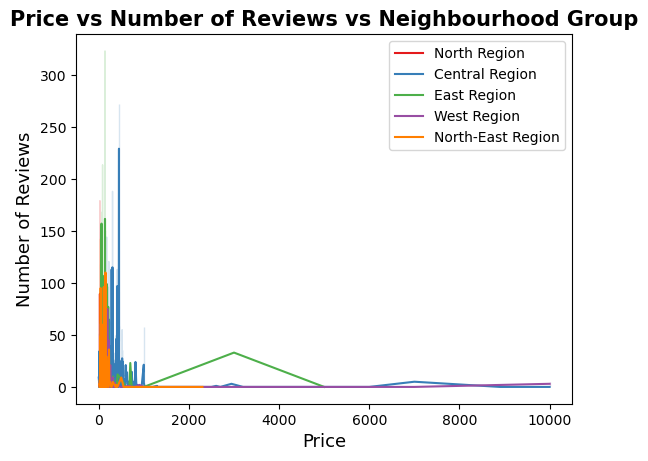

In [313]:
# Set the color palette
sns.set_palette("Set1")

# Plot a line for each region with different line styles
sns.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_group']=='North Region'],
             label='North Region')
sns.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_group']=='Central Region'],
             label='Central Region')
sns.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_group']=='East Region'],
             label='East Region')
sns.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_group']=='West Region'],
             label='West Region')
sns.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_group']=='North-East Region'],
             label='North-East Region')
sns.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_group']=='Jurong West'],
             label='Jurong West')
sns.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_group']=='Museum'],
             label='Museum')
sns.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_group']=='Rochor'],
             label='Rochor')
sns.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_group']=='Sembawang'],
             label='Sembawang')
sns.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_group']=='Orchard'],
             label='Orchard')
sns.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_group']=='Downtown Core'],
             label='Downtown Core')
sns.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_group']=='Southern Islands'],
             label='Southern Islands')
sns.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_group']=='Punggol'],
             label='Punggol')
sns.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_group']=='Bukit Merah'],
             label='Bukit Merah')
sns.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_group']=='Hougang'],
             label='Hougang')

# Define the labels for axes and the title of the plot
plt.xlabel("Price", size=13)
plt.ylabel("Number of Reviews", size=13)
plt.title("Price vs Number of Reviews vs Neighbourhood Group", size=15, weight='bold')

# Show the plot
plt.show()

In [314]:
fig = px.scatter(df, x='longitude', y='latitude',
                 color='neighbourhood_group') # Added color to previous basic 
fig.update_layout(xaxis_title="longitude",yaxis_title="latitude")
fig.show()

In [315]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             7907 non-null   object 
 1   neighbourhood                   7907 non-null   object 
 2   latitude                        7907 non-null   float64
 3   longitude                       7907 non-null   float64
 4   room_type                       7907 non-null   object 
 5   price                           7907 non-null   int64  
 6   minimum_nights                  7907 non-null   int64  
 7   number_of_reviews               7907 non-null   int64  
 8   calculated_host_listings_count  7907 non-null   int64  
 9   availability_365                7907 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 617.9+ KB


In [317]:
Q1 = df.select_dtypes(include = ['number']).quantile(0.25)
Q3 = df.select_dtypes(include = ['number']).quantile(0.75)
IQR = Q3 - Q1

print(IQR)

latitude                            0.026315
longitude                           0.036710
price                             134.000000
minimum_nights                      9.000000
number_of_reviews                  10.000000
calculated_host_listings_count     46.000000
availability_365                  301.000000
dtype: float64


In [319]:
df = df[~((df.select_dtypes(include = ['number']) < (Q1 - 1.5 * IQR)) | (df.select_dtypes(include = ['number']) > (Q3 + 1.5 * IQR))).any(axis=1)]

In [320]:
df.shape

(3872, 10)

In [321]:
feature_columns=['neighbourhood_group','room_type','price','minimum_nights','calculated_host_listings_count','availability_365','latitude', 'longitude']

In [322]:
new_df=df[feature_columns]
new_df.head()

neighbourhood_group        room_type  price  minimum_nights  \
10      Central Region     Private room     44              15   
25      Central Region  Entire home/apt    276               4   
28      Central Region      Shared room    208               1   
37      Central Region     Private room    128               3   
43         East Region     Private room    278               1   

    calculated_host_listings_count  availability_365  latitude  longitude  
10                              32               331   1.28875  103.80814  
25                               1               362   1.33171  103.79383  
28                               1                 0   1.30901  103.79639  
37                               1               365   1.28342  103.78585  
43                               1               365   1.31313  103.91479

In [323]:
new_df['room_type']=new_df['room_type'].factorize()[0]
new_df['neighbourhood_group']=new_df['neighbourhood_group'].factorize()[0]

C:\Users\Ana Paula Damasceno\AppData\Local\Temp\ipykernel_12376\2732932372.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Ana Paula Damasceno\AppData\Local\Temp\ipykernel_12376\2732932372.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [324]:
new_df.head()

neighbourhood_group  room_type  price  minimum_nights  \
10                    0          0     44              15   
25                    0          1    276               4   
28                    0          2    208               1   
37                    0          0    128               3   
43                    1          0    278               1   

    calculated_host_listings_count  availability_365  latitude  longitude  
10                              32               331   1.28875  103.80814  
25                               1               362   1.33171  103.79383  
28                               1                 0   1.30901  103.79639  
37                               1               365   1.28342  103.78585  
43                               1               365   1.31313  103.91479

In [325]:
new_df.shape

(3872, 8)

In [326]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

# Train test e Split 

In [327]:
X = new_df[['neighbourhood_group', 'room_type', 'minimum_nights', 'calculated_host_listings_count', 'availability_365', 'latitude', 'longitude']]
y = new_df['price']

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 


# Teste Size 20%

In [341]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 

In [342]:
# Display the rows and columns (dimenions) of an unsplitted dataset
print('Total number of rows and columns for the complete dataset: ', X.shape, y.shape)

# Display the rows and columns (dimenions) of the splitted dataset
print('Number of rows and columns after splitting dataset: ', X_train.shape, X_test.shape, y_train.shape, y_test.shape )

Total number of rows and columns for the complete dataset:  (3872, 7) (3872,)
Number of rows and columns after splitting dataset:  (3097, 7) (775, 7) (3097,) (775,)


In [343]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Checando os melhores hiperparametros para utilizar no teste

In [344]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

# Define the hyperparameters to be tested
param_grid = {
    # You can add any specific hyperparameters for linear regression, but usually, it's not necessary
}

# Create a GridSearchCV object
grid_search_lr = GridSearchCV(LinearRegression(), param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the training data
grid_search_lr.fit(X_train, y_train)

# Access the best hyperparameters and the best score
best_params_lr = grid_search_lr.best_params_
best_score_lr = -grid_search_lr.best_score_

print("Best hyperparameters for Linear Regression:", best_params_lr)
print("Best score for Linear Regression:", best_score_lr)


Best hyperparameters for Linear Regression: {}
Best score for Linear Regression: 7424.407210319604


In [345]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Defina os hiperparâmetros a serem testados
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10]
}

# Crie um objeto GridSearchCV
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')

# Ajuste o objeto GridSearchCV aos dados de treinamento
grid_search.fit(X_train, y_train)

# Acesse os resultados
print("Melhores hiperparâmetros:", grid_search.best_params_)
print("Melhor pontuação:", -grid_search.best_score_)


Melhores hiperparâmetros: {'max_depth': None, 'n_estimators': 200}
Melhor pontuação: 3090.737950763341


In [350]:
from sklearn.ensemble import GradientBoostingRegressor

# Define the hyperparameters to be tested
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Create a GridSearchCV object
grid_search_gb = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the training data
grid_search_gb.fit(X_train, y_train)

# Access the results
print("Best hyperparameters for Gradient Boosting:", grid_search_gb.best_params_)
print("Best score for Gradient Boosting:", -grid_search_gb.best_score_)

Best hyperparameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50}
Best score for Gradient Boosting: 3292.136393489595


In [356]:
# Inicializar os modelos com diferentes hiperparâmetros
linear_reg = LinearRegression()
random_forest = RandomForestRegressor(n_estimators=200, max_depth=None, random_state=42)
gradient_boosting = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, max_depth=7, random_state=42)

In [357]:
# Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [358]:
# Train the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [359]:
# Train the Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train_scaled, y_train)

GradientBoostingRegressor(random_state=42)

In [360]:
# Function to evaluate the models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    return {'R-squared': r2, 'MAE': mae, 'RMSE': rmse}

# Evaluate the models
lr_metrics = evaluate_model(lr_model, X_test_scaled, y_test)
rf_metrics = evaluate_model(rf_model, X_test_scaled, y_test)
gb_metrics = evaluate_model(gb_model, X_test_scaled, y_test)


print("Linear Regression:", lr_metrics)
print("Random Forest Regressor:", rf_metrics)
print("Gradient Boosting Regressor:", gb_metrics)

Linear Regression: {'R-squared': 0.028409723207713955, 'MAE': 68.102461798844, 'RMSE': 87.10896694842718}
Random Forest Regressor: {'R-squared': 0.6554679463945223, 'MAE': 36.526799999999994, 'RMSE': 51.87237105223401}
Gradient Boosting Regressor: {'R-squared': 0.542951066537787, 'MAE': 44.84812334936978, 'RMSE': 59.74514689838885}


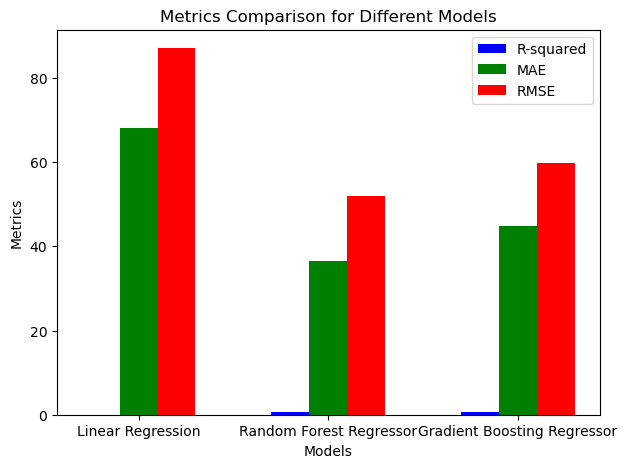

In [394]:
import matplotlib.pyplot as plt

# Resultados das métricas de avaliação
models = ['Linear Regression', 'Random Forest Regressor', 'Gradient Boosting Regressor']
r_squared = [0.028409723207713955, 0.6554679463945223, 0.542951066537787]
mae = [68.102461798844, 36.526799999999994, 44.84812334936978]
rmse = [87.10896694842718, 51.87237105223401, 59.74514689838885]

# Criar o gráfico de barras para métricas de avaliação
plt.figure(figsize=(7, 5))
bar_width = 0.2
index = range(len(models))
plt.bar(index, r_squared, bar_width, label='R-squared', color='b')
plt.bar([i + bar_width for i in index], mae, bar_width, label='MAE', color='g')
plt.bar([i + 2 * bar_width for i in index], rmse, bar_width, label='RMSE', color='r')
plt.xlabel('Models')
plt.ylabel('Metrics')
plt.title('Metrics Comparison for Different Models')
plt.xticks([i + bar_width for i in index], models)
plt.legend()
plt.show()

# Teste Size 25% 

In [361]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42) 

In [362]:
# Display the rows and columns (dimenions) of an unsplitted dataset
print('Total number of rows and columns for the complete dataset: ', X.shape, y.shape)

# Display the rows and columns (dimenions) of the splitted dataset
print('Number of rows and columns after splitting dataset: ', X_train.shape, X_test.shape, y_train.shape, y_test.shape )

Total number of rows and columns for the complete dataset:  (3872, 7) (3872,)
Number of rows and columns after splitting dataset:  (2904, 7) (968, 7) (2904,) (968,)


In [363]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [364]:
# Inicializar os modelos com diferentes hiperparâmetros
linear_reg = LinearRegression()
random_forest = RandomForestRegressor(n_estimators=200, max_depth=None, random_state=42)
gradient_boosting = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, max_depth=7, random_state=42)

In [365]:
# Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [366]:
# Train the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [367]:
# Train the Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train_scaled, y_train)

GradientBoostingRegressor(random_state=42)

In [368]:
# Function to evaluate the models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    return {'R-squared': r2, 'MAE': mae, 'RMSE': rmse}

# Evaluate the models
lr_metrics = evaluate_model(lr_model, X_test_scaled, y_test)
rf_metrics = evaluate_model(rf_model, X_test_scaled, y_test)
gb_metrics = evaluate_model(gb_model, X_test_scaled, y_test)


print("Linear Regression:", lr_metrics)
print("Random Forest Regressor:", rf_metrics)
print("Gradient Boosting Regressor:", gb_metrics)

Linear Regression: {'R-squared': 0.037335164935747844, 'MAE': 67.42728119404885, 'RMSE': 86.7217957071322}
Random Forest Regressor: {'R-squared': 0.6149743411108981, 'MAE': 37.336229338842976, 'RMSE': 54.84481103079973}
Gradient Boosting Regressor: {'R-squared': 0.5070018086151483, 'MAE': 45.60866753906659, 'RMSE': 62.06022861580769}


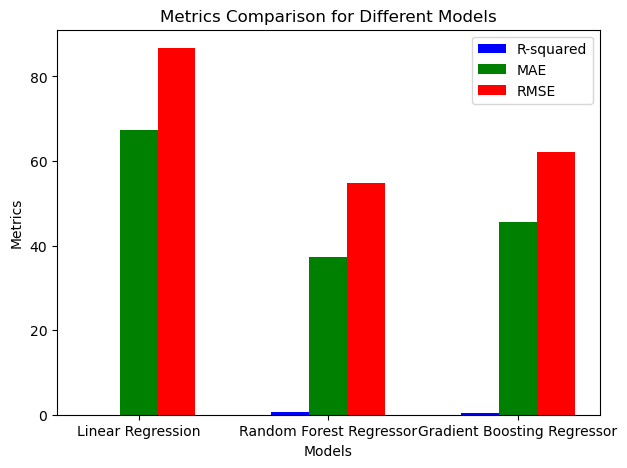

In [393]:
# Dados de exemplo
models = ['Linear Regression', 'Random Forest Regressor', 'Gradient Boosting Regressor']
r_squared = [0.037335164935747844, 0.6149743411108981, 0.5070018086151483]
mae = [67.42728119404885, 37.336229338842976, 45.60866753906659]
rmse = [86.7217957071322, 54.84481103079973, 62.06022861580769]

# Criar o gráfico de barras para métricas de avaliação
plt.figure(figsize=(7, 5))
bar_width = 0.2
index = range(len(models))
plt.bar(index, r_squared, bar_width, label='R-squared', color='b')
plt.bar([i + bar_width for i in index], mae, bar_width, label='MAE', color='g')
plt.bar([i + 2 * bar_width for i in index], rmse, bar_width, label='RMSE', color='r')
plt.xlabel('Models')
plt.ylabel('Metrics')
plt.title('Metrics Comparison for Different Models')
plt.xticks([i + bar_width for i in index], models)
plt.legend()
plt.show()

# Teste Size 30%

In [369]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42) 

In [370]:
# Display the rows and columns (dimenions) of an unsplitted dataset
print('Total number of rows and columns for the complete dataset: ', X.shape, y.shape)

# Display the rows and columns (dimenions) of the splitted dataset
print('Number of rows and columns after splitting dataset: ', X_train.shape, X_test.shape, y_train.shape, y_test.shape )

Total number of rows and columns for the complete dataset:  (3872, 7) (3872,)
Number of rows and columns after splitting dataset:  (2710, 7) (1162, 7) (2710,) (1162,)


In [371]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [372]:
# Inicializar os modelos com diferentes hiperparâmetros
linear_reg = LinearRegression()
random_forest = RandomForestRegressor(n_estimators=200, max_depth=None, random_state=42)
gradient_boosting = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, max_depth=7, random_state=42)

In [373]:
#Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [374]:
# Train the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [375]:
# Train the Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train_scaled, y_train)

GradientBoostingRegressor(random_state=42)

In [377]:
# Function to evaluate the models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    return {'R-squared': r2, 'MAE': mae, 'RMSE': rmse}

# Evaluate the models
lr_metrics = evaluate_model(lr_model, X_test_scaled, y_test)
rf_metrics = evaluate_model(rf_model, X_test_scaled, y_test)
gb_metrics = evaluate_model(gb_model, X_test_scaled, y_test)


print("Linear Regression:", lr_metrics)
print("Random Forest Regressor:", rf_metrics)
print("Gradient Boosting Regressor:", gb_metrics)

Linear Regression: {'R-squared': 0.059545366515862175, 'MAE': 67.45587868169316, 'RMSE': 86.47656238603471}
Random Forest Regressor: {'R-squared': 0.6020611163257541, 'MAE': 38.10515490533563, 'RMSE': 56.25196276629146}
Gradient Boosting Regressor: {'R-squared': 0.5108435435605191, 'MAE': 45.59274296205315, 'RMSE': 62.36678934850899}


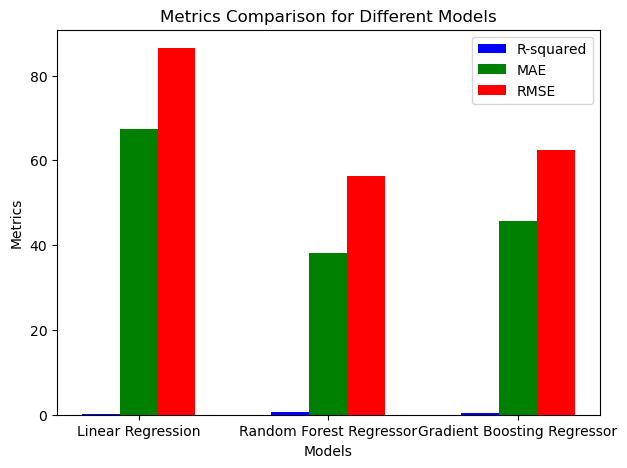

In [392]:
# Dados de exemplo
models = ['Linear Regression', 'Random Forest Regressor', 'Gradient Boosting Regressor']
r_squared = [0.059545366515862175, 0.6020611163257541, 0.5108435435605191]
mae = [67.45587868169316, 38.10515490533563, 45.59274296205315]
rmse = [86.47656238603471, 56.25196276629146, 62.36678934850899]


# Criar o gráfico de barras para métricas de avaliação
plt.figure(figsize=(7, 5))
bar_width = 0.2
index = range(len(models))
plt.bar(index, r_squared, bar_width, label='R-squared', color='b')
plt.bar([i + bar_width for i in index], mae, bar_width, label='MAE', color='g')
plt.bar([i + 2 * bar_width for i in index], rmse, bar_width, label='RMSE', color='r')
plt.xlabel('Models')
plt.ylabel('Metrics')
plt.title('Metrics Comparison for Different Models')
plt.xticks([i + bar_width for i in index], models)
plt.legend()
plt.show()

In [378]:
from sklearn.model_selection import cross_val_score

# Function to evaluate models with cross-validation
def evaluate_model_with_cv(model, X, y):
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)  # Calculate RMSE from MSE scores
    
    return {
        'RMSE Mean': rmse_scores.mean(),
        'RMSE Std': rmse_scores.std()
    }

# Evaluate models with cross-validation
lr_cv_metrics = evaluate_model_with_cv(lr_model, X_train_scaled, y_train)
rf_cv_metrics = evaluate_model_with_cv(rf_model, X_train_scaled, y_train)
gb_cv_metrics = evaluate_model_with_cv(gb_model, X_train_scaled, y_train)

# Display the results
print("Cross-Validation Metrics for Linear Regression:", lr_cv_metrics)
print("Cross-Validation Metrics for Random Forest Regressor:", rf_cv_metrics)
print("Cross-Validation Metrics for Gradient Boosting Regressor:", gb_cv_metrics)


Cross-Validation Metrics for Linear Regression: {'RMSE Mean': 86.29362160904253, 'RMSE Std': 1.1527948839689042}
Cross-Validation Metrics for Random Forest Regressor: {'RMSE Mean': 54.176850956019074, 'RMSE Std': 2.6118866112653216}
Cross-Validation Metrics for Gradient Boosting Regressor: {'RMSE Mean': 59.38021203062969, 'RMSE Std': 2.5946169949572067}


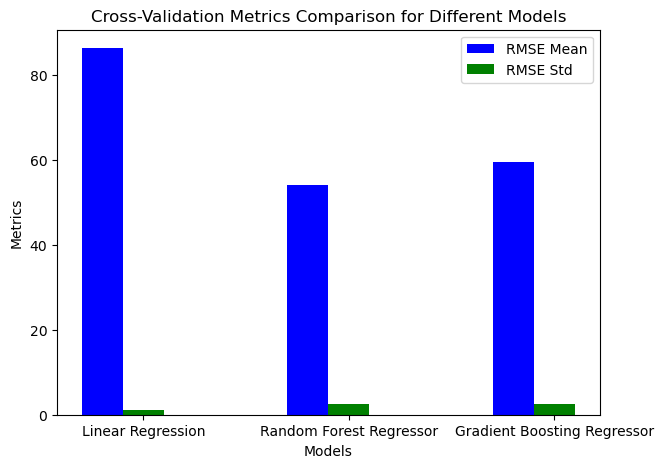

In [391]:
# Resultados das métricas de cross-validation
cv_models = ['Linear Regression', 'Random Forest Regressor', 'Gradient Boosting Regressor']
rmse_mean = [86.29362160904253, 54.176850956019074, 59.38021203062969]
rmse_std = [1.1527948839689042, 2.6118866112653216, 2.5946169949572067]

# Criar o gráfico de barras para métricas de cross-validation
plt.figure(figsize=(7, 5))
plt.bar(index, rmse_mean, bar_width, label='RMSE Mean', color='b')
plt.bar([i + bar_width for i in index], rmse_std, bar_width, label='RMSE Std', color='g')
plt.xlabel('Models')
plt.ylabel('Metrics')
plt.title('Cross-Validation Metrics Comparison for Different Models')
plt.xticks([i + bar_width for i in index], cv_models)
plt.legend()
plt.show()



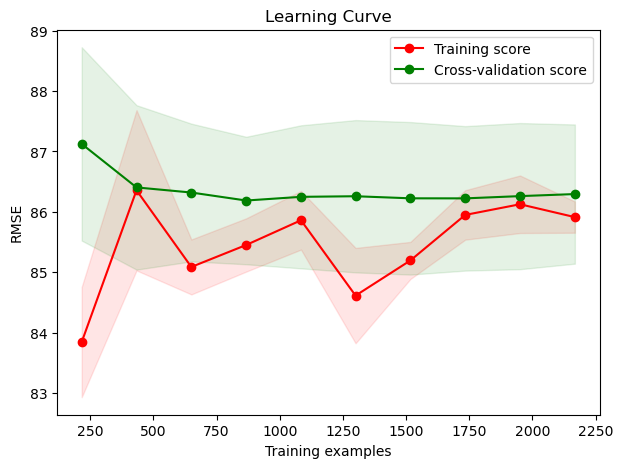

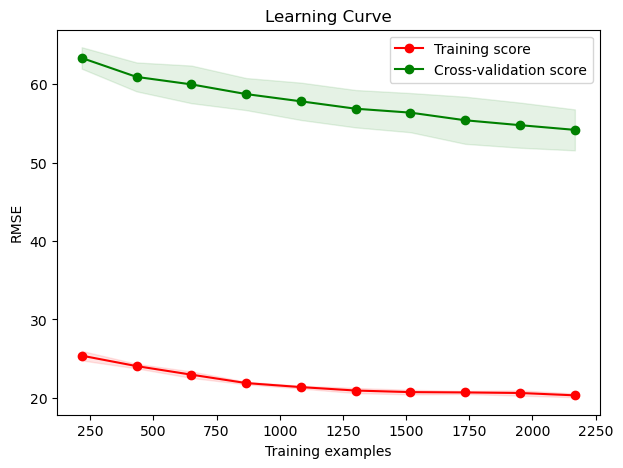

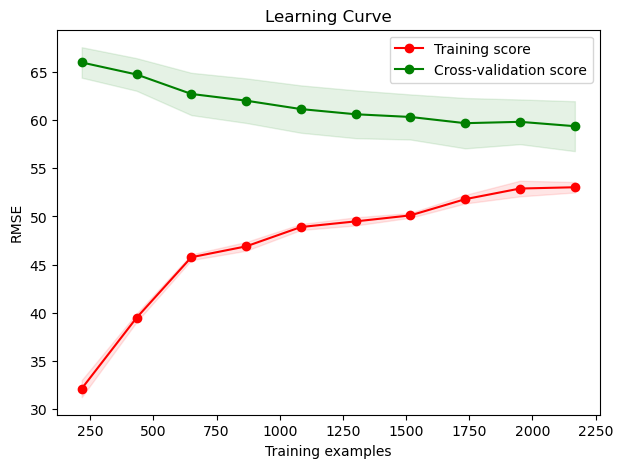

In [401]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10))
    
    train_scores_mean = np.mean(np.sqrt(-train_scores), axis=1)
    train_scores_std = np.std(np.sqrt(-train_scores), axis=1)
    test_scores_mean = np.mean(np.sqrt(-test_scores), axis=1)
    test_scores_std = np.std(np.sqrt(-test_scores), axis=1)
    
    plt.figure(figsize=(7, 5))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.xlabel("Training examples")
    plt.ylabel("RMSE")
    plt.title("Learning Curve")
    plt.legend(loc="best")
    plt.show()

# Plot learning curve for Linear Regression
plot_learning_curve(lr_model, X_train_scaled, y_train)


# Plot learning curve for Random Forest
plot_learning_curve(rf_model, X_train_scaled, y_train)

# Plot learning curve for Gradient Boosting
plot_learning_curve(gb_model, X_train_scaled, y_train)